
# Real Estate Valuation — Refactored ML Workflow

This notebook uses machine learning to predict house prices from the uci real estate valuation dataset.   
It includes:
- Train/test split + 5-fold cross‑validation
- Linear, Ridge, Lasso (with scaling), Decision Tree, Random Forest, Gradient Boosting, Bagging
- Metrics: **Test RMSE, Test R², CV RMSE (mean), CV R² (mean)**
- Comparison **table** and **bar charts**

> Dataset: UCI Real Estate Valuation (House price of unit area).  



In [1]:

# If ucimlrepo is missing, install it (uncomment if needed)
# !pip install ucimlrepo
!pip install ucimlrepo
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor

# Try to fetch via ucimlrepo; fall back message if unavailable.
try:
    from ucimlrepo import fetch_ucirepo
    real_estate_valuation = fetch_ucirepo(id=477)
    X = real_estate_valuation.data.features
    y = real_estate_valuation.data.targets.squeeze()  # ensure 1D array/Series for y
    print("Loaded dataset via ucimlrepo.")
except Exception as e:
    print("Could not load via ucimlrepo. If running locally, install ucimlrepo or replace this cell by reading a CSV.")
    print("Error:", e)
    # Example fallback (uncomment and provide your local path):
    # df = pd.read_csv('real_estate_valuation.csv')
    # X = df.drop(columns=['Y house price of unit area'])  # adjust target column name if needed
    # y = df['Y house price of unit area']


Loaded dataset via ucimlrepo.


In [4]:

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5-fold CV (shuffled for stability)
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [5]:

def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

def cv_rmse_mean(model, X, y, kf):
    # neg_mean_squared_error -> take sqrt of positive values
    scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
    return float(np.mean(np.sqrt(-scores)))

def cv_r2_mean(model, X, y, kf):
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2', n_jobs=-1)
    return float(np.mean(scores))


## Linear Regression

In [6]:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_rmse = rmse(y_test, lr_pred)
lr_r2   = r2_score(y_test, lr_pred)

lr_cv_rmse_mean = cv_rmse_mean(lr_model, X, y, kf)
lr_cv_r2_mean   = cv_r2_mean(lr_model, X, y, kf)

lr_rmse, lr_r2, lr_cv_rmse_mean, lr_cv_r2_mean


(7.3147535245219535, 0.6810580555095691, 8.796071656345706, 0.5693099310625037)

## Ridge Regression (with StandardScaler)

In [7]:

ridge_model = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

ridge_rmse = rmse(y_test, ridge_pred)
ridge_r2   = r2_score(y_test, ridge_pred)

ridge_cv_rmse_mean = cv_rmse_mean(ridge_model, X, y, kf)
ridge_cv_r2_mean   = cv_r2_mean(ridge_model, X, y, kf)

ridge_rmse, ridge_r2, ridge_cv_rmse_mean, ridge_cv_r2_mean


(7.310847911912401, 0.6813985539620184, 8.795017393679183, 0.5694407412054827)

## Lasso Regression (with StandardScaler)

In [8]:

lasso_model = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

lasso_rmse = rmse(y_test, lasso_pred)
lasso_r2   = r2_score(y_test, lasso_pred)

lasso_cv_rmse_mean = cv_rmse_mean(lasso_model, X, y, kf)
lasso_cv_r2_mean   = cv_r2_mean(lasso_model, X, y, kf)

lasso_rmse, lasso_r2, lasso_cv_rmse_mean, lasso_cv_r2_mean


(7.468871406265439, 0.6674766032646409, 8.967403500503249, 0.5526025555532056)

## Decision Tree Regressor

In [9]:

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_rmse = rmse(y_test, dt_pred)
dt_r2   = r2_score(y_test, dt_pred)

dt_cv_rmse_mean = cv_rmse_mean(dt_model, X, y, kf)
dt_cv_r2_mean   = cv_r2_mean(dt_model, X, y, kf)

dt_rmse, dt_r2, dt_cv_rmse_mean, dt_cv_r2_mean


(8.153002255803228, 0.6037699868152279, 9.684297905624565, 0.474129829100038)

## Random Forest Regressor

In [10]:

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_rmse = rmse(y_test, rf_pred)
rf_r2   = r2_score(y_test, rf_pred)

rf_cv_rmse_mean = cv_rmse_mean(rf_model, X, y, kf)
rf_cv_r2_mean   = cv_r2_mean(rf_model, X, y, kf)

rf_rmse, rf_r2, rf_cv_rmse_mean, rf_cv_r2_mean


(5.693072342983686, 0.8068006553352045, 7.326125961370577, 0.7009876080054596)

## Gradient Boosting Regressor

In [11]:

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

gb_rmse = rmse(y_test, gb_pred)
gb_r2   = r2_score(y_test, gb_pred)

gb_cv_rmse_mean = cv_rmse_mean(gb_model, X, y, kf)
gb_cv_r2_mean   = cv_r2_mean(gb_model, X, y, kf)

gb_rmse, gb_r2, gb_cv_rmse_mean, gb_cv_r2_mean


(5.84607471475393, 0.796276575955563, 7.492065777582598, 0.687391089552774)

## Bagging Regressor

In [12]:

bag_model = BaggingRegressor(random_state=42)
bag_model.fit(X_train, y_train)
bag_pred = bag_model.predict(X_test)

bag_rmse = rmse(y_test, bag_pred)
bag_r2   = r2_score(y_test, bag_pred)

bag_cv_rmse_mean = cv_rmse_mean(bag_model, X, y, kf)
bag_cv_r2_mean   = cv_r2_mean(bag_model, X, y, kf)

bag_rmse, bag_r2, bag_cv_rmse_mean, bag_cv_r2_mean


(5.9490087475967455, 0.7890393480260056, 7.706949179460215, 0.6638368035634411)

## Results Table

In [13]:

results = {
    "Linear Regression": {
        "Test RMSE": lr_rmse,
        "Test R²": lr_r2,
        "CV RMSE (mean)": lr_cv_rmse_mean,
        "CV R² (mean)": lr_cv_r2_mean
    },
    "Ridge Regression": {
        "Test RMSE": ridge_rmse,
        "Test R²": ridge_r2,
        "CV RMSE (mean)": ridge_cv_rmse_mean,
        "CV R² (mean)": ridge_cv_r2_mean
    },
    "Lasso Regression": {
        "Test RMSE": lasso_rmse,
        "Test R²": lasso_r2,
        "CV RMSE (mean)": lasso_cv_rmse_mean,
        "CV R² (mean)": lasso_cv_r2_mean
    },
    "Decision Tree": {
        "Test RMSE": dt_rmse,
        "Test R²": dt_r2,
        "CV RMSE (mean)": dt_cv_rmse_mean,
        "CV R² (mean)": dt_cv_r2_mean
    },
    "Random Forest": {
        "Test RMSE": rf_rmse,
        "Test R²": rf_r2,
        "CV RMSE (mean)": rf_cv_rmse_mean,
        "CV R² (mean)": rf_cv_r2_mean
    },
    "Gradient Boosting": {
        "Test RMSE": gb_rmse,
        "Test R²": gb_r2,
        "CV RMSE (mean)": gb_cv_rmse_mean,
        "CV R² (mean)": gb_cv_r2_mean
    },
    "Bagging": {
        "Test RMSE": bag_rmse,
        "Test R²": bag_r2,
        "CV RMSE (mean)": bag_cv_rmse_mean,
        "CV R² (mean)": bag_cv_r2_mean
    }
}

results_df = pd.DataFrame(results).T
results_df


,Test RMSE,Test R²,CV RMSE (mean),CV R² (mean)
Linear Regression,7.314754,0.681058,8.796072,0.569310
Ridge Regression,7.310848,0.681399,8.795017,0.569441
Lasso Regression,7.468871,0.667477,8.967404,0.552603
Decision Tree,8.153002,0.603770,9.684298,0.474130
Random Forest,5.693072,0.806801,7.326126,0.700988
Gradient Boosting,5.846075,0.796277,7.492066,0.687391
Bagging,5.949009,0.789039,7.706949,0.663837


## Comparison Charts

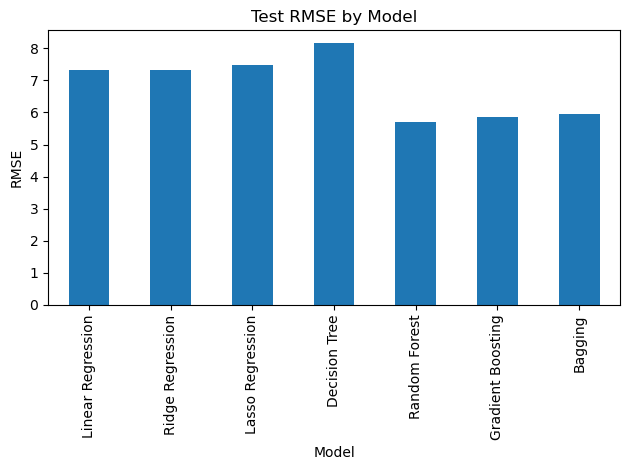

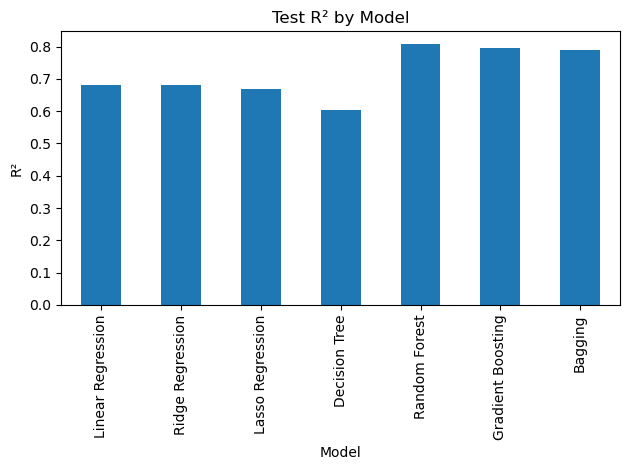

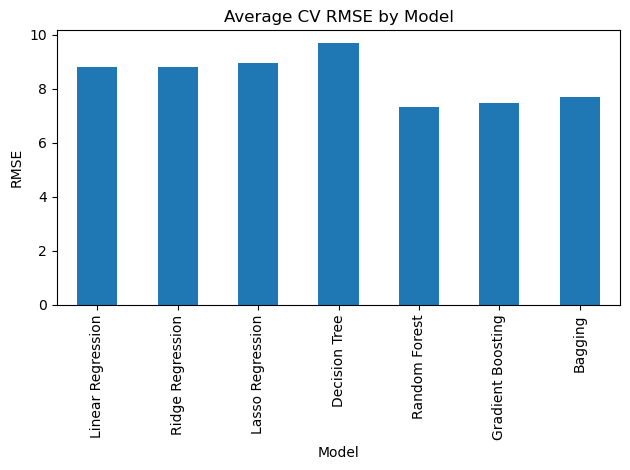

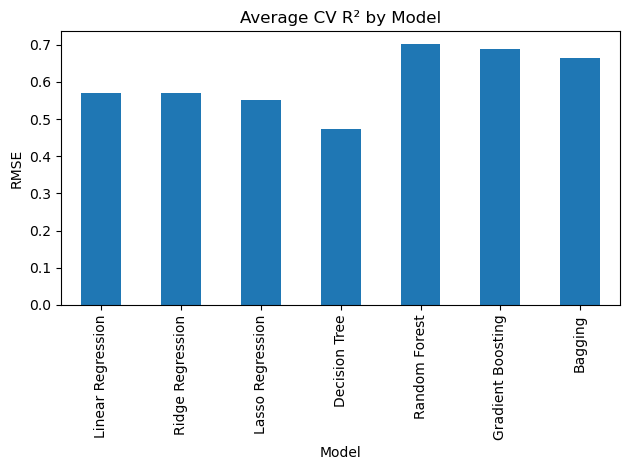

In [15]:

import matplotlib.pyplot as plt

# Test RMSE bar chart (lower is better)
plt.figure()
results_df["Test RMSE"].plot(kind="bar", title="Test RMSE by Model")
plt.ylabel("RMSE")
plt.xlabel("Model")
plt.tight_layout()


# Test R^2 bar chart (higher is better)
plt.figure()
results_df["Test R²"].plot(kind="bar", title="Test R² by Model")
plt.ylabel("R²")
plt.xlabel("Model")
plt.tight_layout()

# Cross-validation RMSE bar chart 

plt.figure()
results_df["CV RMSE (mean)"].plot(kind="bar", title="Average CV RMSE by Model")
plt.ylabel("RMSE")
plt.xlabel("Model")
plt.tight_layout()

#Test R^2 bar chart
plt.figure()
results_df["CV R² (mean)"].plot(kind="bar", title="Average CV R² by Model")
plt.ylabel("RMSE")
plt.xlabel("Model")
plt.tight_layout()





## Conclusion
Overall,  the tree models aside from Decision Tree Regressor performed better than the linear models for all of the mentioned metrics (test rmse, test r2, average cv rmse, average cv r2). The model that performed the best out of the tree models was Random Forest. Since the relationship between the feature and the target is not entirely linear, it is no surprise that the tree models performed better. After all, they are better suited for non-linear relationships. What does come as a bit of a surprise is that Random Forest performed the best. It was initially expected that gradient boosting would be the best performing since it tries to correct for errors. 
